In [2]:
#loading libraries
import pandas as pd 
import numpy as np                     
import seaborn as sns                   
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load datas#Load dataset
bank = pd.read_csv("/Users/shanpriyahome/Personal/Family Folders/Priya/Python/Dataset/Project/bank/bank-full.csv", delimiter=';')
#bank.head()

In [4]:
# size of dataframe
size = bank.size 
  
# shape of dataframe 
shape = bank.shape 
  
# dimensions of data frames and series.
df_ndim = bank.ndim 

# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}". 
format(size, shape, shape[0]*shape[1])) 


Size = 768587
Shape =(45211, 17)
Shape[0] x Shape[1] = 768587


In [5]:
print(bank.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [6]:
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


# Data Imputaion

In [7]:
#check for missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observation: No null values found in bank-full.cvs dataframe.

In [10]:
#loading training and test data
bank_train=pd.read_csv("/Users/shanpriyahome/Personal/Family Folders/Priya/Python/Dataset/Project/bank/bank-full.csv", delimiter=';')
bank_test=pd.read_csv("/Users/shanpriyahome/Personal/Family Folders/Priya/Python/Dataset/Project/bank/bank.csv", delimiter=';')

In [11]:
print(bank_train.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [12]:
print(bank_train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [13]:
print(bank_test.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [14]:
bank_train.shape, bank_test.shape

((45211, 17), (4521, 17))

In [15]:
bank_train['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

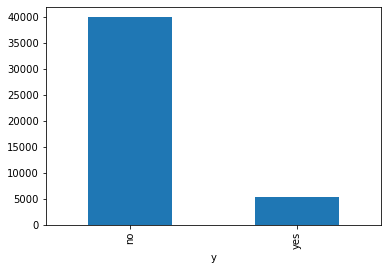

In [16]:
bank_train.groupby('y').size().plot.bar()

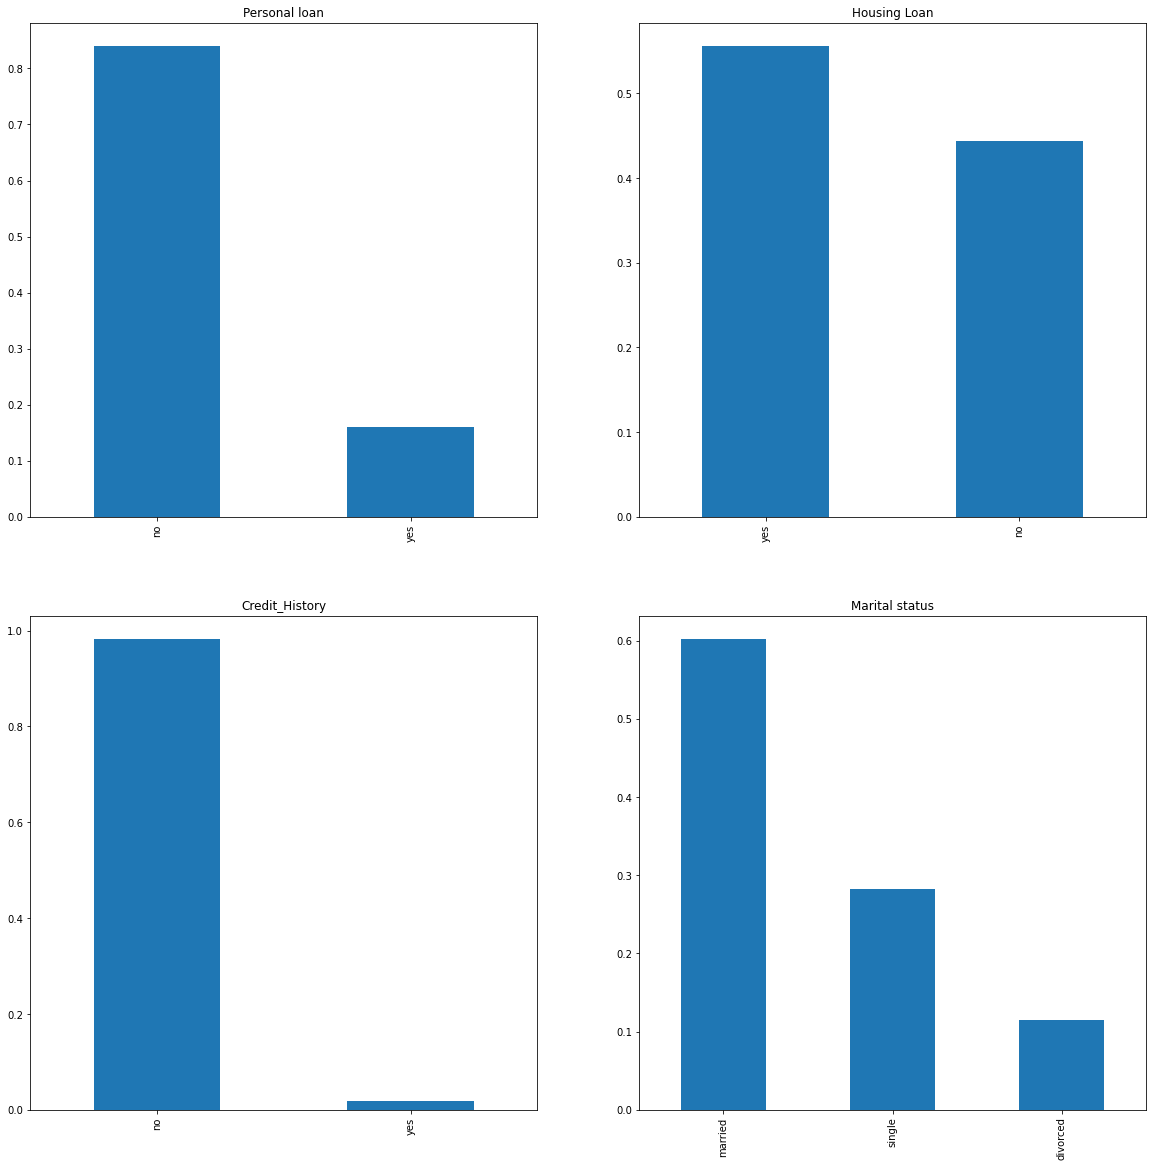

In [17]:
#catergorical Variables 

import matplotlib.pyplot as plt 
plt.figure(1) 

plt.subplot(221)
bank_train['loan'].value_counts(normalize=True).plot.bar(figsize=(20,20), title= 'Personal loan')

plt.subplot(222) 
bank_train['housing'].value_counts(normalize=True).plot.bar(figsize=(20,20),title= 'Housing Loan') 

plt.subplot(223) 
bank_train['default'].value_counts(normalize=True).plot.bar(figsize=(20,20),title= 'Credit_History') 

plt.subplot(224) 
bank_train['marital'].value_counts(normalize=True).plot.bar(figsize=(20,20),title= 'Marital status')

plt.show()

Observations:
Around 88% of the people in the dataset are not having personal loan.
Around 55% of the people in the dataset are having housing loan.
Most of the people need to improve thier credit score.
Around 5% of people in the dataset are having good credit score. 
Around 60% of the people in the dataset are married.
Around 40% of people in the dataset are either single or divorced.


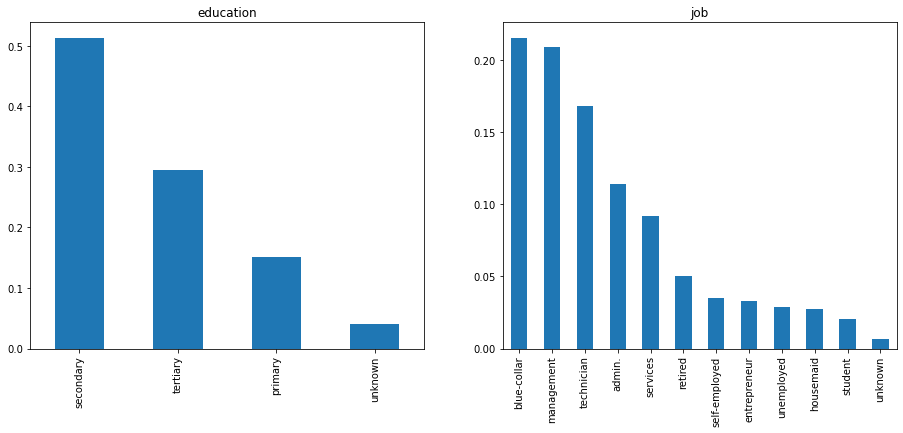

In [18]:
#Independent Variable 

plt.figure(1) 

plt.subplot(131) 
bank_train['education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'education') 

plt.subplot(132) 
bank_train['job'].value_counts(normalize=True).plot.bar(title= 'job') 

plt.show()

Observations:
Most people in this dataset have completed secondary education(Around 55%)
Most people in this dataset have blue-collar(around 25%) and management(around 23%) job.

Text(0.5, 0, 'y')

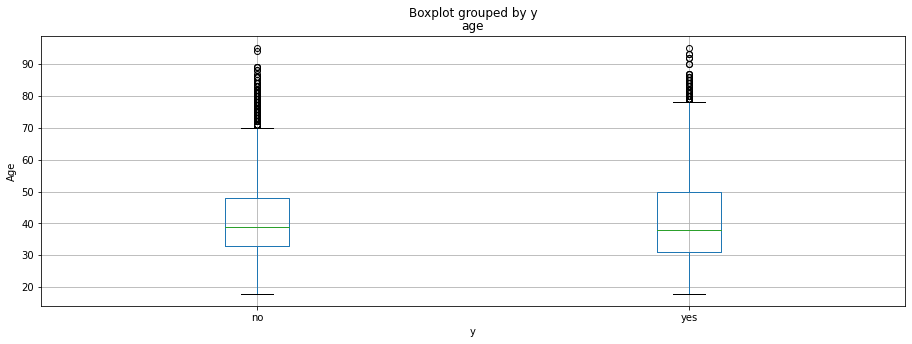

In [19]:
#Independent Variable (Numerical)
bank_train.boxplot('age','y',figsize=(15,5))
plt.ylabel('Age')
plt.xlabel('y')


Text(0, 0.5, 'balance')

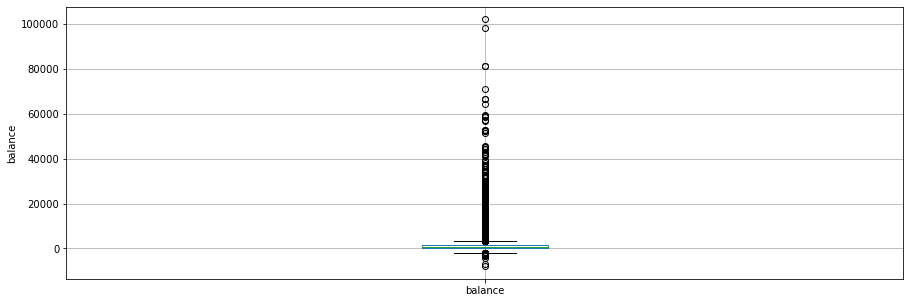

In [20]:
bank_train.boxplot('balance',figsize=(15,5))
plt.ylabel('balance')




In [21]:
#checking number of unknowns in each column
(bank_train=='unknown').sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [22]:
bank_train.job.mode()[0]
bank_train.education.mode()[0]
bank_train.contact.mode()[0]
bank_train.poutcome.mode()[0]

'unknown'

In [23]:
for column in bank_train.job:
    bank_train['job'].fillna(bank_train['job'].mode()[0], inplace=True)

In [25]:
print((bank_train=='unknown').sum())

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64
